In [1]:
import numpy as np
import mujoco
import mediapy
import matplotlib.pyplot as plt
import time
import os

In [2]:
video_index = 0
def load_model_and_reset_data_from_xml(xml_string):
    mj_model = mujoco.MjModel.from_xml_string(xml_string)
    mj_data = mujoco.MjData(mj_model)

    mujoco.mj_resetData(mj_model, mj_data)
    return mj_data, mj_model
    # mj_data.joint('root').qvel = initial_qvel
def render(mj_data, mj_model, framerate=30, play_speed=1, num_frames=30 * 10, save_file_name = None):
    global video_index

    mj_renderer = mujoco.Renderer(mj_model)

    frames = []
    mujoco.mj_forward(mj_model, mj_data)
    for idx in range(num_frames):
        while mj_data.time * framerate / play_speed < idx:
            mujoco.mj_step(mj_model, mj_data)

        # mj_renderer.update_scene(mj_data, camera="fixed")
        mj_renderer.update_scene(mj_data, camera=0)
        frames.append(mj_renderer.render())

    mj_renderer.close()
    mediapy.show_video(frames, fps=framerate)
    video_index += 1
    if save_file_name is not None:
        path = os.path.join("result_videos", f"part1_{video_index:03d}_{save_file_name}")
        mediapy.write_video(path, frames, fps=framerate)

# Joint
https://mujoco.readthedocs.io/en/stable/XMLreference.html#body-joint

## Joint order matters

Note: hinge axis is 0 -1 0, CCW is +

In [3]:
mjcf_xml = """
<mujoco>
  <option timestep=".001">
    <flag energy="enable" contact="disable"/>
  </option>

  <default>
    <joint type="hinge" axis="0 -1 0"/>
    <geom type="capsule" size=".02"/>
  </default>

  <worldbody>
    <light pos="0 -.4 1"/>
    <camera name="fixed" pos="0 -1 0" xyaxes="1 0 0 0 0 1"/>

    <!-- Add coordinate axes visualization -->
    <body name="coordinate_frame" pos="-0.4 0 -0.3">
        <geom name="x_axis" type="capsule" fromto="0 0 0 0.2 0 0" size="0.004" rgba="1 0 0 1"/>  <!-- Red for X axis -->
        <geom name="y_axis" type="capsule" fromto="0 0 0 0 0.2 0" size="0.004" rgba="0 1 0 1"/>  <!-- Green for Y axis -->
        <geom name="z_axis" type="capsule" fromto="0 0 0 0 0 0.2" size="0.004" rgba="0 0 1 1"/>  <!-- Blue for Z axis -->
    </body>
    <geom name="slide_joint_viz" fromto="-0.1 0 0.2 0.1 0 0.2" rgba="1 0 0 1"/>

    <body name="0" pos="0 0 .2">
      <joint type="slide" axis="1 0 0" range="-0.1 0.1" name="slide_joint"/>
      
      <joint name="root"/>
      <geom fromto="0 0 0 0 0 -.25" rgba="1 1 0 1"/>


      <body name="3" pos="0 0 -.25">
        <joint/>
        <geom fromto="0 0 0 0 0 -.2" rgba="0 0 1 1"/>
      </body>
    </body>
  </worldbody>
</mujoco>
"""
mj_data, mj_model = load_model_and_reset_data_from_xml(mjcf_xml)
mj_data.joint('root').qvel = 10
render(mj_data, mj_model, save_file_name="slide_joint_1.mp4")


In [4]:
mjcf_xml = """
<mujoco>
  <compiler angle="radian"/>
  <option timestep=".001">
    <flag energy="enable" contact="disable"/>
  </option>

  <default>
    <joint type="hinge" axis="0 -1 0"/>
    <geom type="capsule" size=".02"/>
  </default>

  <worldbody>
    <light pos="0 -.4 1"/>
    <camera name="fixed" pos="0 -1 0" xyaxes="1 0 0 0 0 1"/>
    <body name="0" pos="0 0 .2">
      <joint name="root"/>
      <joint type="slide" axis="1 0 0" range="-0.1 0.1" name="slide_joint"/>
      <geom name="slide_joint_viz" fromto="-0.1 0 0 0.1 0 0" rgba="1 0 0 1"/>
      <geom fromto="0 0 0 0 0 -.25" rgba="1 1 0 1"/>


      <body name="3" pos="0 0 -.25">
        <joint/>
        <geom fromto="0 0 0 0 0 -.2" rgba="0 0 1 1"/>
      </body>
    </body>
  </worldbody>
</mujoco>
"""
mj_data, mj_model = load_model_and_reset_data_from_xml(mjcf_xml)
mj_data.joint('root').qvel = 10
render(mj_data, mj_model, play_speed=0.7, num_frames=30 * 3, save_file_name="slide_joint_2.mp4")


In [5]:
mjcf_xml = """
<mujoco>
  <compiler angle="radian"/>
  <option timestep=".001">
    <flag energy="enable" contact="disable"/>
  </option>

  <default>
    <joint type="hinge" axis="0 -1 0"/>
    <geom type="capsule" size=".02"/>
  </default>

  <worldbody>
    <light pos="0 -.4 1"/>
    <camera name="fixed" pos="0 -1 0" xyaxes="1 0 0 0 0 1"/>
    <body name="0" pos="0 0 .2">
      <joint name="root"/>
      <joint type="slide" axis="0 0 1" range="-0.1 0.1" name="slide_joint"/>
      <geom name="slide_joint_viz" fromto="0 0 -0.1 0 0 0.1" rgba="1 0 0 1"/>

      <geom fromto="0 0 0 0 0 -.25" rgba="1 1 0 1"/>


      <body name="3" pos="0 0 -.25">
        <joint/>
        <geom fromto="0 0 0 0 0 -.2" rgba="0 0 1 1"/>
      </body>
    </body>
  </worldbody>
</mujoco>
"""
mj_data, mj_model = load_model_and_reset_data_from_xml(mjcf_xml)
mj_data.joint('root').qvel = 20
render(mj_data, mj_model, play_speed=0.3, num_frames=30 * 3, save_file_name="slide_joint_3.mp4")


## Joint stiffness, damping, ref

ref: initial value of joint(different with changing qpos, ref set initial position as ref)

In [6]:
mjcf_xml = """
<mujoco>
    <compiler angle="radian"/>
  <option timestep=".001">
    <flag energy="enable" contact="disable"/>

  </option>

  <default>
    <joint type="hinge" axis="0 -1 0"/>
    <geom type="capsule" size=".02"/>
  </default>

  <worldbody>
    <light pos="0 -.4 1"/>
    <camera name="fixed" pos="0 -1 0" xyaxes="1 0 0 0 0 1"/>
    <body name="0" pos="0 0 .2">
      <joint name="root" stiffness="2" damping="0.9" ref="6.28" springref="0"/>
      <geom fromto="0 0 0 0 0 -.25" rgba="1 1 0 1"/>


      <body name="3" pos="0 0 -.25">
        <joint/>
        <geom fromto="0 0 0 0 0 -.2" rgba="0 0 1 1"/>
      </body>
    </body>
  </worldbody>
</mujoco>
"""
mj_data, mj_model = load_model_and_reset_data_from_xml(mjcf_xml)
mj_data.joint('root').qvel = 0
render(mj_data, mj_model, num_frames=30 * 4, save_file_name="joint_ref_628.mp4")


In [7]:
mjcf_xml = """
<mujoco>
    <compiler angle="radian"/>
  <option timestep=".001">
    <flag energy="enable" contact="disable"/>

  </option>

  <default>
    <joint type="hinge" axis="0 -1 0"/>
    <geom type="capsule" size=".02"/>
  </default>

  <worldbody>
    <light pos="0 -.4 1"/>
    <camera name="fixed" pos="0 -1 0" xyaxes="1 0 0 0 0 1"/>
    <body name="0" pos="0 0 .2">
      <joint name="root" stiffness="2" damping="0.9" springref="6.28"/>
      <geom fromto="0 0 0 0 0 -.25" rgba="1 1 0 1"/>


      <body name="3" pos="0 0 -.25">
        <joint/>
        <geom fromto="0 0 0 0 0 -.2" rgba="0 0 1 1"/>
      </body>
    </body>
  </worldbody>
</mujoco>
"""
mj_data, mj_model = load_model_and_reset_data_from_xml(mjcf_xml)
mj_data.joint('root').qvel = 0
render(mj_data, mj_model, num_frames=30 * 4, save_file_name="joint_springref_628.mp4")

In [8]:
mjcf_xml = """
<mujoco>
    <compiler angle="radian"/>
  <option timestep=".001">
    <flag energy="enable" contact="disable"/>

  </option>

  <default>
    <joint type="hinge" axis="0 -1 0"/>
    <geom type="capsule" size=".02"/>
  </default>

  <worldbody>
    <light pos="0 -.4 1"/>
    <camera name="fixed" pos="0 -1 0" xyaxes="1 0 0 0 0 1"/>
    <body name="0" pos="0 0 .2">
      <joint name="root" stiffness="2" damping="0.9" springref="6.28" ref="6.28"/>
      <geom fromto="0 0 0 0 0 -.25" rgba="1 1 0 1"/>


      <body name="3" pos="0 0 -.25">
        <joint/>
        <geom fromto="0 0 0 0 0 -.2" rgba="0 0 1 1"/>
      </body>
    </body>
  </worldbody>
</mujoco>
"""
mj_data, mj_model = load_model_and_reset_data_from_xml(mjcf_xml)
mj_data.joint('root').qvel = 0
render(mj_data, mj_model, num_frames=30 * 4, save_file_name="joint_ref_springref_628.mp4")

## damping

In [9]:
for damping in [0.0, 0.3, 0.9]:
    mjcf_xml = f"""
    <mujoco>
        <compiler angle="radian"/>
    <option timestep=".001">
        <flag energy="enable" contact="disable"/>

    </option>

    <default>
        <joint type="hinge" axis="0 -1 0"/>
        <geom type="capsule" size=".02"/>
    </default>

    <worldbody>
        <light pos="0 -.4 1"/>
        <camera name="fixed" pos="0 -1 0" xyaxes="1 0 0 0 0 1"/>
        <body name="0" pos="0 0 .2">
        <joint name="root" stiffness="2" damping="{damping}" springref="6.28"/>
        <geom fromto="0 0 0 0 0 -.25" rgba="1 1 0 1"/>


        <body name="3" pos="0 0 -.25">
            <joint/>
            <geom fromto="0 0 0 0 0 -.2" rgba="0 0 1 1"/>
        </body>
        </body>
    </worldbody>
    </mujoco>
    """
    mj_data, mj_model = load_model_and_reset_data_from_xml(mjcf_xml)
    mj_data.joint('root').qvel = 0
    render(mj_data, mj_model, num_frames=30 * 4, save_file_name=f"joint_damping_{damping}.mp4")

## Stiffness

In [10]:
for stiffness in [0.1, 0.3, 0.9]:
    mjcf_xml = f"""
    <mujoco>
        <compiler angle="radian"/>
    <option timestep=".001">
        <flag energy="enable" contact="disable"/>

    </option>

    <default>
        <joint type="hinge" axis="0 -1 0"/>
        <geom type="capsule" size=".02"/>
    </default>

    <worldbody>
        <light pos="0 -.4 1"/>
        <camera name="fixed" pos="0 -1 0" xyaxes="1 0 0 0 0 1"/>
        <body name="0" pos="0 0 .2">
        <joint name="root" stiffness="{stiffness}" damping="0.9" springref="6.28"/>
        <geom fromto="0 0 0 0 0 -.25" rgba="1 1 0 1"/>


        <body name="3" pos="0 0 -.25">
            <joint/>
            <geom fromto="0 0 0 0 0 -.2" rgba="0 0 1 1"/>
        </body>
        </body>
    </worldbody>
    </mujoco>
    """
    mj_data, mj_model = load_model_and_reset_data_from_xml(mjcf_xml)
    mj_data.joint('root').qvel = 0
    render(mj_data, mj_model, num_frames=30 * 4, save_file_name=f"joint_stiffness_{stiffness}.mp4")


## Frictionloss vs damping

In [11]:
for frictionloss in [0.1, 1, 10]:
    mjcf_xml = f"""
    <mujoco>
        <compiler angle="radian"/>
    <option timestep=".001">
        <flag energy="enable" contact="disable"/>

    </option>

    <default>
        <joint type="hinge" axis="0 -1 0"/>
        <geom type="capsule" size=".02"/>
    </default>

    <worldbody>
        <light pos="0 -.4 1"/>
        <camera name="fixed" pos="0 -1 0" xyaxes="1 0 0 0 0 1"/>
        <body name="0" pos="0 0 .2">
        <joint name="root" stiffness="0" damping="0" frictionloss="{frictionloss}" springref="6.28"/>
        <geom fromto="0 0 0 0 0 -.25" rgba="1 1 0 1"/>


        <body name="3" pos="0 0 -.25">
            <joint/>
            <geom fromto="0 0 0 0 0 -.2" rgba="0 0 1 1"/>
        </body>
        </body>
    </worldbody>
    </mujoco>
    """
    mj_data, mj_model = load_model_and_reset_data_from_xml(mjcf_xml)
    mj_data.joint('root').qpos = 0.3
    mj_data.joint('root').qvel = 10
    render(mj_data, mj_model, num_frames=30 * 10, play_speed=10, save_file_name=f"joint_frictionloss_{frictionloss}.mp4")

In [12]:
for damping in [0.1, 1, 10]:
    mjcf_xml = f"""
    <mujoco>
        <compiler angle="radian"/>
    <option timestep=".001">
        <flag energy="enable" contact="disable"/>

    </option>

    <default>
        <joint type="hinge" axis="0 -1 0"/>
        <geom type="capsule" size=".02"/>
    </default>

    <worldbody>
        <light pos="0 -.4 1"/>
        <camera name="fixed" pos="0 -1 0" xyaxes="1 0 0 0 0 1"/>
        <body name="0" pos="0 0 .2">
        <joint name="root" stiffness="0" damping="{damping}" frictionloss="0" springref="6.28"/>
        <geom fromto="0 0 0 0 0 -.25" rgba="1 1 0 1"/>


        <body name="3" pos="0 0 -.25">
            <joint/>
            <geom fromto="0 0 0 0 0 -.2" rgba="0 0 1 1"/>
        </body>
        </body>
    </worldbody>
    </mujoco>
    """
    mj_data, mj_model = load_model_and_reset_data_from_xml(mjcf_xml)
    mj_data.joint('root').qpos = 0.3
    mj_data.joint('root').qvel = 10
    render(mj_data, mj_model, num_frames=30 * 10, play_speed=10, save_file_name=f"joint_damping_{damping}.mp4")

## joint contact

vanila

In [13]:
mjcf_xml = """
<mujoco>
    <compiler angle="radian"/>
  <option timestep=".001">
    <flag energy="enable" contact="disable"/>

  </option>

  <default>
    <joint type="hinge" axis="0 -1 0"/>
    <geom type="capsule" size=".02"/>
  </default>

  <worldbody>
    <light pos="0 -.4 1"/>
    <camera name="fixed" pos="0 -1 -0.2" xyaxes="1 0 0 0 0 1"/>

    <!-- Add coordinate axes visualization -->
    <body name="coordinate_frame" pos="-0.4 0 -0.03">
        <geom name="x_axis" type="capsule" fromto="0 0 0 0.2 0 0" size="0.004" rgba="1 0 0 1"/>  <!-- Red for X axis -->
        <geom name="y_axis" type="capsule" fromto="0 0 0 0 0.2 0" size="0.004" rgba="0 1 0 1"/>  <!-- Green for Y axis -->
        <geom name="z_axis" type="capsule" fromto="0 0 0 0 0 0.2" size="0.004" rgba="0 0 1 1"/>  <!-- Blue for Z axis -->
    </body>


    <body name="0" pos="0 0 0">
      <joint type="slide" axis="0 0 1" range="-0.03 0.03" name="slide_joint"/>
      <joint name="root" stiffness="2" damping="0.9" ref="0"/>
      <geom fromto="0 0 0 0 0 -.25" rgba="1 1 0 1"/>


      <body name="3" pos="0 0 -.25">
        <joint/>
        <geom fromto="0 0 0 0 0 -.2" rgba="0 0 1 1"/>
        <body name="weight" pos="0 0 -.2">
          <geom type="sphere" size=".05" rgba="1 0 0 1" mass="50"/>
        </body>
      </body>
    </body>
  </worldbody>
</mujoco>
"""
mj_data, mj_model = load_model_and_reset_data_from_xml(mjcf_xml)
mj_data.joint('root').qvel = 0
render(mj_data, mj_model, play_speed=1, num_frames=30 * 3, save_file_name=f"joint_contact_vanila.mp4")


## solreflimit

In [14]:
for solreflimit in [0.01, 0.2, 0.5]:

    mjcf_xml = f"""
    <mujoco>
        <compiler angle="radian"/>
    <option timestep=".001">
        <flag energy="enable" contact="disable"/>

    </option>

    <default>
        <joint type="hinge" axis="0 -1 0"/>
        <geom type="capsule" size=".02"/>
    </default>

    <worldbody>
        <light pos="0 -.4 1"/>
        <camera name="fixed" pos="0 -1 -0.2" xyaxes="1 0 0 0 0 1"/>

        <!-- Add coordinate axes visualization -->
        <body name="coordinate_frame" pos="-0.4 0 -0.03">
            <geom name="x_axis" type="capsule" fromto="0 0 0 0.2 0 0" size="0.004" rgba="1 0 0 1"/>  <!-- Red for X axis -->
            <geom name="y_axis" type="capsule" fromto="0 0 0 0 0.2 0" size="0.004" rgba="0 1 0 1"/>  <!-- Green for Y axis -->
            <geom name="z_axis" type="capsule" fromto="0 0 0 0 0 0.2" size="0.004" rgba="0 0 1 1"/>  <!-- Blue for Z axis -->
        </body>


        <body name="0" pos="0 0 0">
        <joint type="slide" axis="0 0 1" range="-0.03 0.03" name="slide_joint" solreflimit="{solreflimit}"/>
        <joint name="root" stiffness="2" damping="0.9" ref="0"/>
        <geom fromto="0 0 0 0 0 -.25" rgba="1 1 0 1"/>


        <body name="3" pos="0 0 -.25">
            <joint/>
            <geom fromto="0 0 0 0 0 -.2" rgba="0 0 1 1"/>
            <body name="weight" pos="0 0 -.2">
            <geom type="sphere" size=".05" rgba="1 0 0 1" mass="50"/>
            </body>
        </body>
        </body>
    </worldbody>
    </mujoco>
    """
    mj_data, mj_model = load_model_and_reset_data_from_xml(mjcf_xml)
    mj_data.joint('root').qvel = 0
    render(mj_data, mj_model, play_speed=1, num_frames=30 * 3, save_file_name=f"solreflimit_{solreflimit}.mp4")


solimplimit, solreffriction, solimpfriction -> no big difference (need graph?)

## margin

In [15]:
slide_range = 0.1
for margin in [0, 0.05, 0.2]:
    mjcf_xml = f"""
    <mujoco>
        <compiler angle="radian"/>
    <option timestep=".001">
        <flag energy="enable" contact="disable"/>

    </option>

    <default>
        <joint type="hinge" axis="0 -1 0"/>
        <geom type="capsule" size=".02"/>
    </default>

    <worldbody>
        <light pos="0 -.4 1"/>
        <camera name="fixed" pos="0 -1 -{slide_range}" xyaxes="1 0 0 0 0 1"/>

        <!-- Add coordinate axes visualization -->
        <body name="coordinate_frame" pos="-0.4 0 -{slide_range}">
            <geom name="x_axis" type="capsule" fromto="0 0 0 0.2 0 0" size="0.004" rgba="1 0 0 1"/>  <!-- Red for X axis -->
            <geom name="y_axis" type="capsule" fromto="0 0 0 0 0.2 0" size="0.004" rgba="0 1 0 1"/>  <!-- Green for Y axis -->
            <geom name="z_axis" type="capsule" fromto="0 0 0 0 0 0.2" size="0.004" rgba="0 0 1 1"/>  <!-- Blue for Z axis -->
        </body>


        <body name="0" pos="0 0 0">
        <joint type="slide" axis="0 0 1" range="-{slide_range} {slide_range}" name="slide_joint" margin="{margin}"/>
        <joint name="root" stiffness="2" damping="0.9" ref="0"/>
        <geom fromto="0 0 0 0 0 -.25" rgba="1 1 0 1"/>


        <body name="3" pos="0 0 -.25">
            <joint/>
            <geom fromto="0 0 0 0 0 -.2" rgba="0 0 1 1"/>
            <body name="weight" pos="0 0 -.2">
            <geom type="sphere" size=".05" rgba="1 0 0 1" mass="50"/>
            </body>
        </body>
        </body>
    </worldbody>
    </mujoco>
    """
    mj_data, mj_model = load_model_and_reset_data_from_xml(mjcf_xml)
    mj_data.joint('root').qvel = 0
    render(mj_data, mj_model, play_speed=0.1, num_frames=30 * 3, save_file_name=f"joint_margin_{margin}.mp4")


## Armature

In [16]:
for armature in [0, 10, 100]:
    mjcf_xml = f"""
    <mujoco>
        <compiler angle="radian"/>
    <option timestep=".001">
        <flag energy="enable" contact="disable"/>

    </option>

    <default>
        <joint type="hinge" axis="0 -1 0"/>
        <geom type="capsule" size=".02"/>
    </default>

    <worldbody>
        <light pos="0 -.4 1"/>
        <camera name="fixed" pos="0 -1 0" xyaxes="1 0 0 0 0 1"/>

        <!-- Add coordinate axes visualization -->
        <body name="coordinate_frame" pos="-0.4 0 0">
            <geom name="x_axis" type="capsule" fromto="0 0 0 0.2 0 0" size="0.004" rgba="1 0 0 1"/>  <!-- Red for X axis -->
            <geom name="y_axis" type="capsule" fromto="0 0 0 0 0.2 0" size="0.004" rgba="0 1 0 1"/>  <!-- Green for Y axis -->
            <geom name="z_axis" type="capsule" fromto="0 0 0 0 0 0.2" size="0.004" rgba="0 0 1 1"/>  <!-- Blue for Z axis -->
        </body>


        <body name="0" pos="0 0 0">
        <joint name="root" stiffness="2" damping="0.9" ref="0" armature="{armature}"/>
        <geom fromto="0 0 0 0 0 -.25" rgba="1 1 0 1"/>


        <body name="3" pos="0 0 -.25">
            <joint/>
            <geom fromto="0 0 0 0 0 -.2" rgba="0 0 1 1"/>
            <body name="weight" pos="0 0 -.2">
            <geom type="sphere" size=".05" rgba="1 0 0 1" mass="50"/>
            </body>
        </body>
        </body>
    </worldbody>
    </mujoco>
    """
    mj_data, mj_model = load_model_and_reset_data_from_xml(mjcf_xml)
    mj_data.joint('root').qvel = 10
    render(mj_data, mj_model, play_speed=1, num_frames=30 * 3, save_file_name=f"joint_armature_{armature}.mp4")


## Frictionloss

In [17]:
for frictionloss in [0.1, 1, 100000]:
    mjcf_xml = f"""
    <mujoco>
        <compiler angle="radian"/>
    <option timestep=".001">
        <flag energy="enable" contact="disable"/>

    </option>

    <default>
        <joint type="hinge" axis="0 -1 0"/>
        <geom type="capsule" size=".02"/>
    </default>

    <worldbody>
        <light pos="0 -.4 1"/>
        <camera name="fixed" pos="0 -1 0" xyaxes="1 0 0 0 0 1"/>

        <!-- Add coordinate axes visualization -->
        <body name="coordinate_frame" pos="-0.4 0 0">
            <geom name="x_axis" type="capsule" fromto="0 0 0 0.2 0 0" size="0.004" rgba="1 0 0 1"/>  <!-- Red for X axis -->
            <geom name="y_axis" type="capsule" fromto="0 0 0 0 0.2 0" size="0.004" rgba="0 1 0 1"/>  <!-- Green for Y axis -->
            <geom name="z_axis" type="capsule" fromto="0 0 0 0 0 0.2" size="0.004" rgba="0 0 1 1"/>  <!-- Blue for Z axis -->
        </body>


        <body name="0" pos="0 0 0">
        <joint name="root" stiffness="0" damping="0.9" frictionloss="{frictionloss}" ref="0"/>
        <geom fromto="0 0 0 0 0 -.25" rgba="1 1 0 1"/>


        <body name="3" pos="0 0 -.25">
            <joint/>
            <geom fromto="0 0 0 0 0 -.2" rgba="0 0 1 1"/>
            <body name="weight" pos="0 0 -.2">
            <geom type="sphere" size=".05" rgba="1 0 0 1" mass="50"/>
            </body>
        </body>
        </body>
    </worldbody>
    </mujoco>
    """
    mj_data, mj_model = load_model_and_reset_data_from_xml(mjcf_xml)
    mj_data.joint('root').qpos = 0.3
    mj_data.joint('root').qvel = 10
    render(mj_data, mj_model, play_speed=10, num_frames=30 * 3, save_file_name=f"joint_frictionloss_{frictionloss}.mp4")


### versus damping

In [18]:
for damping in [0.1, 1, 1000]:
    mjcf_xml = f"""
    <mujoco>
        <compiler angle="radian"/>
    <option timestep=".001">
        <flag energy="enable" contact="disable"/>

    </option>

    <default>
        <joint type="hinge" axis="0 -1 0"/>
        <geom type="capsule" size=".02"/>
    </default>

    <worldbody>
        <light pos="0 -.4 1"/>
        <camera name="fixed" pos="0 -1 -0.2" xyaxes="1 0 0 0 0 1"/>

        <!-- Add coordinate axes visualization -->
        <body name="coordinate_frame" pos="-0.4 0 0">
            <geom name="x_axis" type="capsule" fromto="0 0 0 0.2 0 0" size="0.004" rgba="1 0 0 1"/>  <!-- Red for X axis -->
            <geom name="y_axis" type="capsule" fromto="0 0 0 0 0.2 0" size="0.004" rgba="0 1 0 1"/>  <!-- Green for Y axis -->
            <geom name="z_axis" type="capsule" fromto="0 0 0 0 0 0.2" size="0.004" rgba="0 0 1 1"/>  <!-- Blue for Z axis -->
        </body>


        <body name="0" pos="0 0 0">
        <joint name="root" stiffness="0" damping="{damping}" ref="0"/>
        <geom fromto="0 0 0 0 0 -.25" rgba="1 1 0 1"/>


        <body name="3" pos="0 0 -.25">
            <joint/>
            <geom fromto="0 0 0 0 0 -.2" rgba="0 0 1 1"/>
            <body name="weight" pos="0 0 -.2">
            <geom type="sphere" size=".05" rgba="1 0 0 1" mass="50"/>
            </body>
        </body>
        </body>
    </worldbody>
    </mujoco>
    """
    mj_data, mj_model = load_model_and_reset_data_from_xml(mjcf_xml)
    mj_data.joint('root').qpos = 0.3
    mj_data.joint('root').qvel = 10
    render(mj_data, mj_model, play_speed=10, num_frames=30 * 3, save_file_name=f"joint_damping_{damping}.mp4")


# Contact

free joint

In [19]:
mjcf_xml = f"""
<mujoco>
    <compiler angle="radian"/>
  <option timestep=".001">
    <flag energy="enable" contact="enable"/>

  </option>

  <default>
    <joint type="hinge" axis="0 -1 0"/>
    <geom type="capsule" size=".02"/>
  </default>

  <worldbody>
    <light pos="0 -.4 1"/>
    <camera name="fixed" pos="0 -1 -0.2" xyaxes="1 0 0 0 0 1"/>

    <!-- Add coordinate axes visualization -->
    <body name="coordinate_frame" pos="-0.4 0 0">
        <geom name="x_axis" type="capsule" fromto="0 0 0 0.2 0 0" size="0.004" rgba="1 0 0 1"/>  <!-- Red for X axis -->
        <geom name="y_axis" type="capsule" fromto="0 0 0 0 0.2 0" size="0.004" rgba="0 1 0 1"/>  <!-- Green for Y axis -->
        <geom name="z_axis" type="capsule" fromto="0 0 0 0 0 0.2" size="0.004" rgba="0 0 1 1"/>  <!-- Blue for Z axis -->
    </body>

    <!-- Add ground plane -->
    <geom name="ground" type="plane" pos="0 0 -0.3" size="100 100 0.1" rgba=".9 .9 .9 1"/>

    <body name="weight" pos="0 0 0">
        <joint name="free_joint" type="free"/>
        <!-- <joint name="vertical" type="slide" axis="0 0 1"/>
        <joint name="horizontal" type="slide" axis="1 0 0"/> -->
        <geom type="sphere" size=".05" rgba="1 0 0 1" mass="50"/>
    </body>
  </worldbody>
</mujoco>
"""
mj_data, mj_model = load_model_and_reset_data_from_xml(mjcf_xml)
mj_data.joint('free_joint').qpos = np.array([-0.3,0,0, 0,0,0,0])
mj_data.joint('free_joint').qvel = np.array([10,0,-10, 0,0,0])
# mj_data.joint('horizontal').qpos = -0.3
# mj_data.joint('vertical').qvel = -10
# mj_data.joint('horizontal').qvel = 10

render(mj_data, mj_model, play_speed=0.1, num_frames=30 * 3, save_file_name=f"contact_free_joint.mp4")

2D with no rotation

In [20]:
mjcf_xml = f"""
<mujoco>
    <compiler angle="radian"/>
  <option timestep=".001">
    <flag energy="enable" contact="enable"/>

  </option>

  <default>
    <joint type="hinge" axis="0 -1 0"/>
    <geom type="capsule" size=".02"/>
  </default>

  <worldbody>
    <light pos="0 -.4 1"/>
    <camera name="fixed" pos="0 -1 -0.2" xyaxes="1 0 0 0 0 1"/>

    <!-- Add coordinate axes visualization -->
    <body name="coordinate_frame" pos="-0.4 0 0">
        <geom name="x_axis" type="capsule" fromto="0 0 0 0.2 0 0" size="0.004" rgba="1 0 0 1"/>  <!-- Red for X axis -->
        <geom name="y_axis" type="capsule" fromto="0 0 0 0 0.2 0" size="0.004" rgba="0 1 0 1"/>  <!-- Green for Y axis -->
        <geom name="z_axis" type="capsule" fromto="0 0 0 0 0 0.2" size="0.004" rgba="0 0 1 1"/>  <!-- Blue for Z axis -->
    </body>

    <!-- Add ground plane -->
    <geom name="ground" type="plane" pos="0 0 -0.3" size="100 100 0.1" rgba=".9 .9 .9 1"/>

    <body name="weight" pos="0 0 0">
        <!-- <joint name="free_joint" type="free"/> -->
        <joint name="vertical" type="slide" axis="0 0 1"/>
        <joint name="horizontal" type="slide" axis="1 0 0"/>
        <geom type="sphere" size=".05" rgba="1 0 0 1" mass="50"/>
    </body>
  </worldbody>
</mujoco>
"""
mj_data, mj_model = load_model_and_reset_data_from_xml(mjcf_xml)

# mj_data.joint('free_joint').qpos = np.array([-0.3,0,0, 0,0,0,0])
# mj_data.joint('free_joint').qvel = np.array([10,0,-10, 0,0,0])
mj_data.joint('horizontal').qpos = -0.3
mj_data.joint('vertical').qvel = -10
mj_data.joint('horizontal').qvel = 10

render(mj_data, mj_model, play_speed=0.1, num_frames=30 * 3, save_file_name=f"contact_no_rot.mp4")

### solif

solref : real(2), “0.02 1”

(timeconst,dampratio)

solref[0] = 0.000001

In [21]:
for solref0 in [0.02, 0.05, 0.1]:
    for solref1 in [0.1, 3]:
        mjcf_xml = f"""
        <mujoco>
            <compiler angle="radian"/>
        <option timestep=".001">
            <flag energy="enable" contact="enable"/>

        </option>

        <default>
            <joint type="hinge" axis="0 -1 0"/>
            <geom type="capsule" size=".02"/>
        </default>

        <worldbody>
            <light pos="0 -.4 1"/>
            <camera name="fixed" pos="0 -1 -0.2" xyaxes="1 0 0 0 0 1"/>

            <!-- Add coordinate axes visualization -->
            <body name="coordinate_frame" pos="-0.4 0 0">
                <geom name="x_axis" type="capsule" fromto="0 0 0 0.2 0 0" size="0.004" rgba="1 0 0 1"/>  <!-- Red for X axis -->
                <geom name="y_axis" type="capsule" fromto="0 0 0 0 0.2 0" size="0.004" rgba="0 1 0 1"/>  <!-- Green for Y axis -->
                <geom name="z_axis" type="capsule" fromto="0 0 0 0 0 0.2" size="0.004" rgba="0 0 1 1"/>  <!-- Blue for Z axis -->
            </body>

            <!-- Add ground plane -->
            <geom name="ground" type="plane" pos="0 0 -0.3" size="100 100 0.1" rgba=".9 .9 .9 1"/>

            <body name="weight" pos="0 0 0">
                <!-- <joint name="free_joint" type="free"/> -->
                <joint name="vertical" type="slide" axis="0 0 1"/>
                <joint name="horizontal" type="slide" axis="1 0 0"/>
                <!-- solref : real(2), “0.02 1” solimp : real(5), “0.9 0.95 0.001 0.5 2” -->
                <geom type="sphere" size=".05" rgba="1 0 0 1" mass="1" solref="{solref0} {solref1}"/>
            </body>
        </worldbody>
        </mujoco>
        """
        mj_data, mj_model = load_model_and_reset_data_from_xml(mjcf_xml)

        # mj_data.joint('free_joint').qpos = np.array([-0.3,0,0, 0,0,0,0])
        # mj_data.joint('free_joint').qvel = np.array([10,0,-10, 0,0,0])
        mj_data.joint('horizontal').qpos = -0.3
        mj_data.joint('vertical').qvel = -10
        mj_data.joint('horizontal').qvel = 10
        print(f"solref: {solref0} {solref1}")
        render(mj_data, mj_model, play_speed=0.1, num_frames=30 * 3, save_file_name=f"contact_solref_{solref0}_{solref1}.mp4")

solref: 0.02 0.1


solref: 0.02 3


solref: 0.05 0.1


solref: 0.05 3


solref: 0.1 0.1


solref: 0.1 3


change both solref(ground, sphere)

In [22]:
for solref0 in [0.02, 0.05, 0.1]:
    for solref1 in [0.1, 3]:
        mjcf_xml = f"""
        <mujoco>
            <compiler angle="radian"/>
        <option timestep=".001">
            <flag energy="enable" contact="enable"/>

        </option>

        <default>
            <joint type="hinge" axis="0 -1 0"/>
            <geom type="capsule" size=".02"/>
        </default>

        <worldbody>
            <light pos="0 -.4 1"/>
            <camera name="fixed" pos="0 -1 -0.2" xyaxes="1 0 0 0 0 1"/>

            <!-- Add coordinate axes visualization -->
            <body name="coordinate_frame" pos="-0.4 0 0">
                <geom name="x_axis" type="capsule" fromto="0 0 0 0.2 0 0" size="0.004" rgba="1 0 0 1"/>  <!-- Red for X axis -->
                <geom name="y_axis" type="capsule" fromto="0 0 0 0 0.2 0" size="0.004" rgba="0 1 0 1"/>  <!-- Green for Y axis -->
                <geom name="z_axis" type="capsule" fromto="0 0 0 0 0 0.2" size="0.004" rgba="0 0 1 1"/>  <!-- Blue for Z axis -->
            </body>

            <!-- Add ground plane -->
            <geom name="ground" type="plane" pos="0 0 -0.3" size="100 100 0.1" rgba=".9 .9 .9 1" solref="{solref0} {solref1}"/>

            <body name="weight" pos="0 0 0">
                <!-- <joint name="free_joint" type="free"/> -->
                <joint name="vertical" type="slide" axis="0 0 1"/>
                <joint name="horizontal" type="slide" axis="1 0 0"/>
                <!-- solref : real(2), “0.02 1” solimp : real(5), “0.9 0.95 0.001 0.5 2” -->
                <geom type="sphere" size=".05" rgba="1 0 0 1" mass="1" solref="{solref0} {solref1}"/>
            </body>
        </worldbody>
        </mujoco>
        """
        mj_data, mj_model = load_model_and_reset_data_from_xml(mjcf_xml)

        # mj_data.joint('free_joint').qpos = np.array([-0.3,0,0, 0,0,0,0])
        # mj_data.joint('free_joint').qvel = np.array([10,0,-10, 0,0,0])
        mj_data.joint('horizontal').qpos = -0.3
        mj_data.joint('vertical').qvel = -10
        mj_data.joint('horizontal').qvel = 10
        print(f"solref: {solref0} {solref1}")
        render(mj_data, mj_model, play_speed=0.1, num_frames=30 * 3, save_file_name=f"contact_both_solref_{solref0}_{solref1}.mp4")

solref: 0.02 0.1


solref: 0.02 3


solref: 0.05 0.1


solref: 0.05 3


solref: 0.1 0.1


solref: 0.1 3


pair

In [23]:
for solref0 in [0.02, 0.05, 0.1]:
    for solref1 in [0.1, 3]:
        mjcf_xml = f"""
        <mujoco>
            <compiler angle="radian"/>
        <option timestep=".001">
            <flag energy="enable" contact="enable"/>

        </option>

        <default>
            <joint type="hinge" axis="0 -1 0"/>
            <geom type="capsule" size=".02"/>
        </default>

        <contact>
            <pair geom1="ground" geom2="object" friction="1 0 0.005 0.0001 0.0" solref="{solref0} {solref1}"/>
        </contact>

        <worldbody>
            <light pos="0 -.4 1"/>
            <camera name="fixed" pos="0 -1 -0.2" xyaxes="1 0 0 0 0 1"/>

            <!-- Add coordinate axes visualization -->
            <body name="coordinate_frame" pos="-0.4 0 0">
                <geom name="x_axis" type="capsule" fromto="0 0 0 0.2 0 0" size="0.004" rgba="1 0 0 1"/>  <!-- Red for X axis -->
                <geom name="y_axis" type="capsule" fromto="0 0 0 0 0.2 0" size="0.004" rgba="0 1 0 1"/>  <!-- Green for Y axis -->
                <geom name="z_axis" type="capsule" fromto="0 0 0 0 0 0.2" size="0.004" rgba="0 0 1 1"/>  <!-- Blue for Z axis -->
            </body>

            <!-- Add ground plane -->
            <geom name="ground" type="plane" pos="0 0 -0.3" size="100 100 0.1" rgba=".9 .9 .9 1"/>

            <body name="weight" pos="0 0 0">
                <!-- <joint name="free_joint" type="free"/> -->
                <joint name="vertical" type="slide" axis="0 0 1"/>
                <joint name="horizontal" type="slide" axis="1 0 0"/>
                <!-- solref : real(2), “0.02 1” solimp : real(5), “0.9 0.95 0.001 0.5 2” -->
                <geom name="object" type="sphere" size=".05" rgba="1 0 0 1" mass="1"/>
            </body>
        </worldbody>
        </mujoco>
        """
        mj_data, mj_model = load_model_and_reset_data_from_xml(mjcf_xml)

        # mj_data.joint('free_joint').qpos = np.array([-0.3,0,0, 0,0,0,0])
        # mj_data.joint('free_joint').qvel = np.array([10,0,-10, 0,0,0])
        mj_data.joint('horizontal').qpos = -0.3
        mj_data.joint('vertical').qvel = -10
        mj_data.joint('horizontal').qvel = 10
        print(f"solref: {solref0} {solref1}")
        render(mj_data, mj_model, play_speed=0.1, num_frames=30 * 3, save_file_name=f"contact_pair_solref_{solref0}_{solref1}.mp4")

solref: 0.02 0.1


solref: 0.02 3


solref: 0.05 0.1


solref: 0.05 3


solref: 0.1 0.1


solref: 0.1 3


### solimp

solimp : real(5), “0.9 0.95 0.001 0.5 2”

[d_0, d_width, width, midpoint, power]

https://mujoco.readthedocs.io/en/stable/modeling.html#csolver


![solimp](./images/solimp_pow_mid.png)



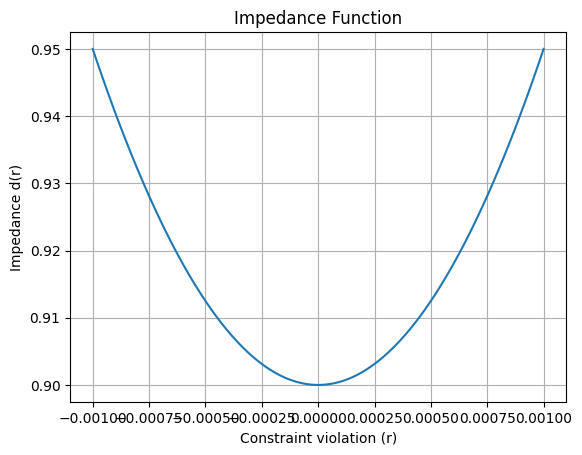

In [24]:
def impedance_function(r, d0, d_width, width, midpoint, power):
    x = np.abs(r) / width
    if power == 1:
        return d0 + (d_width - d0) * x
    else:
        return d0 + (d_width - d0) * (x ** power)

def draw_impedance_with_param(d0, d_width, width, midpoint, power):
    r = np.linspace(-width, width, 100)
    d = impedance_function(r, d0, d_width, width, midpoint, power)

    plt.plot(r, d)
    plt.xlabel('Constraint violation (r)')
    plt.ylabel('Impedance d(r)')
    plt.title('Impedance Function')
    plt.grid(True)
    plt.show()

    
d0, d_width, width, midpoint, power = 0.9, 0.95, 0.001, 0.5, 2
draw_impedance_with_param(d0, d_width, width, midpoint, power)


0.9, 0.95, 0.001, 0.5, 1


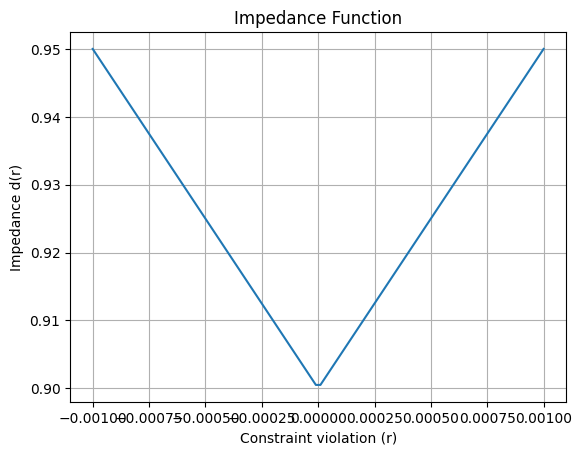

0.9, 0.95, 0.001, 0.5, 2


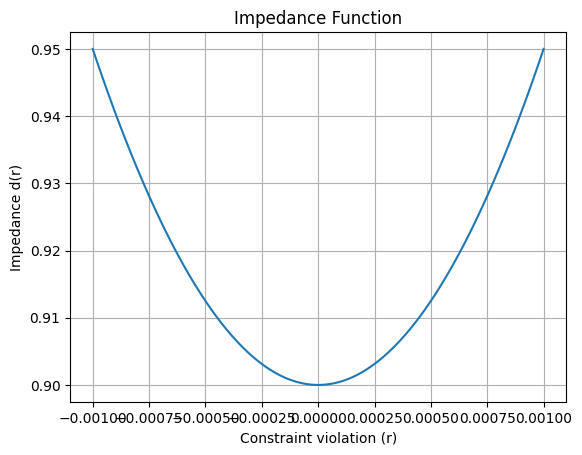

0.9, 0.95, 0.001, 0.5, 10


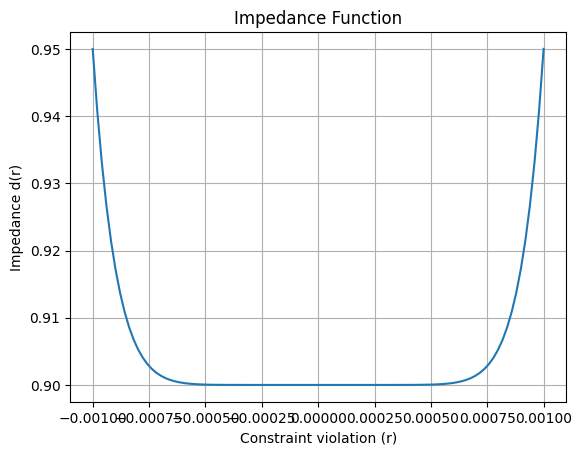

0.1, 0.2, 0.001, 0.5, 2


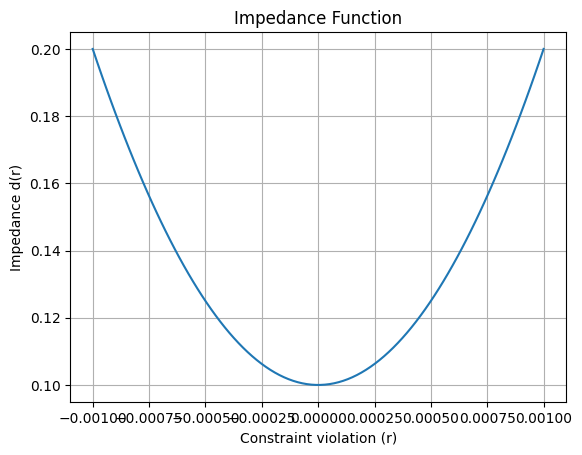

0.9, 0.95, 1, 0.5, 2


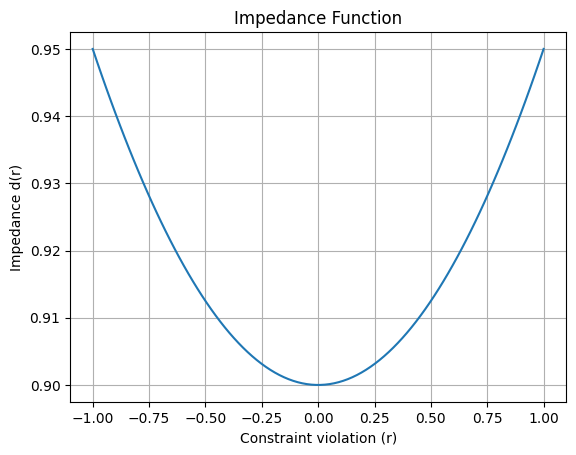

In [25]:
for d0, d_width, width, midpoint, power in [
                                            [0.9, 0.95, 0.001, 0.5, 1],
                                            [0.9, 0.95, 0.001, 0.5, 2],
                                            [0.9, 0.95, 0.001, 0.5, 10],
                                            [0.1, 0.2, 0.001, 0.5, 2],
                                            [0.9, 0.95, 1, 0.5, 2],
                                            ]:
    print(f"{d0}, {d_width}, {width}, {midpoint}, {power}")
    draw_impedance_with_param(d0, d_width, width, midpoint, power)
    mjcf_xml = f"""
    <mujoco>
        <compiler angle="radian"/>
    <option timestep=".001">
        <flag energy="enable" contact="enable"/>

    </option>

    <default>
        <joint type="hinge" axis="0 -1 0"/>
        <geom type="capsule" size=".02"/>
    </default>

    <contact>
        <pair geom1="ground" geom2="object" solimp="{d0} {d_width} {width} {midpoint} {power}"/>
    </contact>

    <worldbody>
        <light pos="0 -.4 1"/>
        <camera name="fixed" pos="0 -1 -0.2" xyaxes="1 0 0 0 0 1"/>

        <!-- Add coordinate axes visualization -->
        <body name="coordinate_frame" pos="-0.4 0 0">
            <geom name="x_axis" type="capsule" fromto="0 0 0 0.2 0 0" size="0.004" rgba="1 0 0 1"/>  <!-- Red for X axis -->
            <geom name="y_axis" type="capsule" fromto="0 0 0 0 0.2 0" size="0.004" rgba="0 1 0 1"/>  <!-- Green for Y axis -->
            <geom name="z_axis" type="capsule" fromto="0 0 0 0 0 0.2" size="0.004" rgba="0 0 1 1"/>  <!-- Blue for Z axis -->
        </body>

        <!-- Add ground plane -->
        <geom name="ground" type="plane" pos="0 0 -0.3" size="100 100 0.1" rgba=".9 .9 .9 1"/>

        <body name="weight" pos="0 0 0">
            <!-- <joint name="free_joint" type="free"/> -->
            <joint name="vertical" type="slide" axis="0 0 1"/>
            <joint name="horizontal" type="slide" axis="1 0 0"/>
            <!-- solref : real(2), “0.02 1” solimp : real(5), “0.9 0.95 0.001 0.5 2” -->
            <geom name="object" type="sphere" size=".05" rgba="1 0 0 1" mass="1"/>
        </body>
    </worldbody>
    </mujoco>
    """
    mj_data, mj_model = load_model_and_reset_data_from_xml(mjcf_xml)

    # mj_data.joint('free_joint').qpos = np.array([-0.3,0,0, 0,0,0,0])
    # mj_data.joint('free_joint').qvel = np.array([10,0,-10, 0,0,0])
    mj_data.joint('horizontal').qpos = -0.3
    mj_data.joint('vertical').qvel = -10
    mj_data.joint('horizontal').qvel = 10

    render(mj_data, mj_model, play_speed=0.1, num_frames=30 * 3, save_file_name=f"contact_solimp_{d0}_{d_width}_{width}_{midpoint}_{power}.mp4")

## condim, friction

https://mujoco.readthedocs.io/en/stable/computation/index.html#cocontact

friction: real(3), “1 0.005 0.0001”

The reason for having 5 coefficients per contact and only 3 per geom is as follows. For a contact pair, we want to allow the most flexible model our solver can handle. As mentioned earlier, anisotropic friction can be exploited to model effects such as skating. This however requires knowing how the two axes of the contact tangent plane are oriented. For a predefined contact pair we know the two geom types in advance, and the corresponding collision function always generates contact frames oriented in the same way – which we do not describe here but it can be seen in the visualizer. For individual geoms however, we do not know which other geoms they might collide with and what their geom types might be, so there is no way to know how the contact tangent plane will be oriented when specifying an individual geom. This is why MuJoCo does not allow anisotropic friction in the individual geom specifications, but only in the explicit contact pair specifications.

In [26]:
for condim in [1,3,4,6]:
    print(f"condim: {condim}")
    mjcf_xml = f"""
    <mujoco>
        <compiler angle="radian"/>
    <option timestep=".001">
        <flag energy="enable" contact="enable"/>

    </option>

    <default>
        <joint type="hinge" axis="0 -1 0"/>
        <geom type="capsule" size=".02"/>
    </default>
    
    <contact>
        <exclude body1="coordinate_frame" body2="weight"/>
    </contact>

    <worldbody>
        <light pos="0 -.4 1"/>
        <camera name="fixed" pos="0 -1 -0.2" xyaxes="1 0 0 0 0 1"/>

        <!-- Add coordinate axes visualization -->
        <body name="coordinate_frame" pos="-0.4 0 0">
            <geom name="x_axis" type="capsule" fromto="0 0 0 0.2 0 0" size="0.004" rgba="1 0 0 1"/>  <!-- Red for X axis -->
            <geom name="y_axis" type="capsule" fromto="0 0 0 0 0.2 0" size="0.004" rgba="0 1 0 1"/>  <!-- Green for Y axis -->
            <geom name="z_axis" type="capsule" fromto="0 0 0 0 0 0.2" size="0.004" rgba="0 0 1 1"/>  <!-- Blue for Z axis -->
        </body>

        <!-- Add ground plane -->
        <geom name="ground" type="plane" pos="0 0 -0.3" size="100 100 0.1" rgba=".9 .9 .9 1" condim="{condim}"/>

        <body name="weight" pos="0 0 0">
            <joint name="free_joint" type="free"/>
            
            <geom type="capsule" fromto="0 0 0 0.1 0.1 0.1" size=".05" rgba="1 0 0 1" mass="1" condim="{condim}"/>
        </body>
    </worldbody>
    </mujoco>
    """
    mj_data, mj_model = load_model_and_reset_data_from_xml(mjcf_xml)

    mj_data.joint('free_joint').qpos = np.array([-0.3,0,0, 0,0,0,0])
    mj_data.joint('free_joint').qvel = np.array([10,0,-10, 0,0,0])
    # mj_data.joint('horizontal').qpos = -0.3
    # mj_data.joint('vertical').qvel = -10
    # mj_data.joint('horizontal').qvel = 10

    render(mj_data, mj_model, play_speed=0.1, num_frames=30 * 3, save_file_name=f"condim_{condim}.mp4")

condim: 1


condim: 3


condim: 4


condim: 6


# contact pair

friction: real(5), “1 1 0.005 0.0001 0.0001”

In [27]:
for condim in [1,3,4,6]:
    print(f"condim: {condim}")
    mjcf_xml = f"""
    <mujoco>
        <compiler angle="radian"/>
    <option timestep=".001">
        <flag energy="enable" contact="enable"/>

    </option>

    <default>
        <joint type="hinge" axis="0 -1 0"/>
        <geom type="capsule" size=".02"/>
    </default>

    <contact>
        <pair geom1="ground" geom2="object_red" friction="1 0 0.005 0.0001 0.0" condim="{condim}"/>
        <pair geom1="ground" geom2="object_green" friction="0 1 0.005 0.0 0.0001" condim="{condim}"/>

        <exclude body1="coordinate_frame" body2="weight_red"/>
        <exclude body1="coordinate_frame" body2="weight_green"/>
    </contact>

    <worldbody>
        <light pos="0 -.4 1"/>
        <camera name="fixed" pos="0 -2 -0.2" xyaxes="1 0 0 0 0 1"/>

        <!-- Add coordinate axes visualization -->
        <body name="coordinate_frame" pos="-0.4 0 0">
            <geom name="x_axis" type="capsule" fromto="0 0 0 0.2 0 0" size="0.004" rgba="1 0 0 1"/>  <!-- Red for X axis -->
            <geom name="y_axis" type="capsule" fromto="0 0 0 0 0.2 0" size="0.004" rgba="0 1 0 1"/>  <!-- Green for Y axis -->
            <geom name="z_axis" type="capsule" fromto="0 0 0 0 0 0.2" size="0.004" rgba="0 0 1 1"/>  <!-- Blue for Z axis -->
        </body>

        <!-- Add ground plane -->
        <geom name="ground" type="plane" pos="0 0 -0.3" size="100 100 0.1" rgba=".9 .9 .9 1"/>

        <body name="weight_red" pos="0 0 0">
            <!--<joint name="free_joint_red" type="free"/>-->
            <joint name="slide_x_red" type="slide" axis="1 0 0"/>
            <joint name="slide_y_red" type="slide" axis="0 1 0"/>
            <joint name="slide_z_red" type="slide" axis="0 0 1"/>


            <geom name="object_red" type="capsule" fromto="0 0 0 0.1 0.1 0.1" size=".05" rgba="1 0 0 1" mass="1"/>
        </body>

        <body name="weight_green" pos="0 0 0">
            <!-- <joint name="free_joint_green" type="free"/>-->
            
            <joint name="slide_x_green" type="slide" axis="1 0 0"/>
            <joint name="slide_y_green" type="slide" axis="0 1 0"/>
            <joint name="slide_z_green" type="slide" axis="0 0 1"/>
            
            <geom name="object_green" type="capsule" fromto="0 0 0 0.1 0.1 0.1" size=".05" rgba="0 1 0 1" mass="1"/>
        </body>
    </worldbody>
    </mujoco>
    """
    mj_data, mj_model = load_model_and_reset_data_from_xml(mjcf_xml)

    # mj_data.joint('free_joint_red').qpos = np.array([-0.6,0,0, 0,0,0,0])
    # mj_data.joint('free_joint_red').qvel = np.array([10,-10,-10, 0,0,0])

    # mj_data.joint('free_joint_green').qpos = np.array([-0.3,0,0, 0,0,0,0])
    # mj_data.joint('free_joint_green').qvel = np.array([10,-10,-10, 0,0,0])

    mj_data.joint('slide_x_red').qpos = -0.6
    mj_data.joint('slide_x_red').qvel = 10
    mj_data.joint('slide_y_red').qvel = -10
    mj_data.joint('slide_z_red').qvel = -10

    mj_data.joint('slide_x_green').qpos = -0.3
    mj_data.joint('slide_x_green').qvel = 10
    mj_data.joint('slide_y_green').qvel = -10
    mj_data.joint('slide_z_green').qvel = -10

    render(mj_data, mj_model, play_speed=0.1, num_frames=30 * 3, save_file_name=f"condim_pair_{condim}.mp4")

condim: 1


condim: 3


condim: 4


condim: 6


### rotation

In [28]:
for condim in [1,3,4,6]:
    print(f"condim: {condim}")
    mjcf_xml = f"""
    <mujoco>
        <compiler angle="radian"/>
    <option timestep=".001">
        <flag energy="enable" contact="enable"/>

    </option>

    <default>
        <joint type="hinge" axis="0 -1 0"/>
        <geom type="capsule" size=".02"/>
    </default>

    <contact>
        <pair geom1="ground" geom2="object_red" friction="1 1 0.005 0.0001 0.0001" condim="{condim}"/>
        <pair geom1="ground" geom2="object_green" friction="1 1 0.5 0.0001 0.0001" condim="{condim}"/>

        <exclude body1="coordinate_frame" body2="weight_red"/>
        <exclude body1="coordinate_frame" body2="weight_green"/>
    </contact>

    <worldbody>
        <light pos="0 -.4 1"/>
        <camera name="fixed" pos="0 -2 -0.2" xyaxes="1 0 0 0 0 1"/>

        <!-- Add coordinate axes visualization -->
        <body name="coordinate_frame" pos="-0.4 0 0">
            <geom name="x_axis" type="capsule" fromto="0 0 0 0.2 0 0" size="0.004" rgba="1 0 0 1"/>  <!-- Red for X axis -->
            <geom name="y_axis" type="capsule" fromto="0 0 0 0 0.2 0" size="0.004" rgba="0 1 0 1"/>  <!-- Green for Y axis -->
            <geom name="z_axis" type="capsule" fromto="0 0 0 0 0 0.2" size="0.004" rgba="0 0 1 1"/>  <!-- Blue for Z axis -->
        </body>

        <!-- Add ground plane -->
        <geom name="ground" type="plane" pos="0 0 -0.3" size="100 100 0.1" rgba=".9 .9 .9 1"/>

        <body name="weight_red" pos="-0.3 0 0">
            <!--<joint name="free_joint_red" type="free"/>-->
            <joint name="slide_z_red" type="slide" axis="0 0 1"/>
            <joint name="rotate_z_red" type="hinge" axis="0 0 1"/>

            <geom name="object_red" type="capsule" fromto="0 0 0 0.1 0.1 0.1" size=".05" rgba="1 0 0 1" mass="1"/>
        </body>

        <body name="weight_green" pos="0.3 0 0">
            <!-- <joint name="free_joint_green" type="free"/>-->

            <joint name="slide_z_green" type="slide" axis="0 0 1"/>
            <joint name="rotate_z_green" type="hinge" axis="0 0 1"/>
            
            <geom name="object_green" type="capsule" fromto="0 0 0 0.1 0.1 0.1" size=".05" rgba="0 1 0 1" mass="1"/>
        </body>
    </worldbody>
    </mujoco>
    """
    mj_data, mj_model = load_model_and_reset_data_from_xml(mjcf_xml)

    # mj_data.joint('free_joint_red').qpos = np.array([-0.6,0,0, 0,0,0,0])
    # mj_data.joint('free_joint_red').qvel = np.array([10,-10,-10, 0,0,0])

    # mj_data.joint('free_joint_green').qpos = np.array([-0.3,0,0, 0,0,0,0])
    # mj_data.joint('free_joint_green').qvel = np.array([10,-10,-10, 0,0,0])

    # mj_data.joint('slide_x_red').qpos = -0.6
    mj_data.joint('slide_z_red').qvel = -10
    mj_data.joint('rotate_z_red').qvel = 10

    # mj_data.joint('slide_x_green').qpos = -0.3
    mj_data.joint('slide_z_green').qvel = -10
    mj_data.joint('rotate_z_green').qvel = 10

    render(mj_data, mj_model, play_speed=1, num_frames=30 * 3, save_file_name=f"condim_rotation_{condim}.mp4")

condim: 1


condim: 3


condim: 4


condim: 6


### roll

In [29]:
for condim in [1,3,4,6]:
    print(f"condim: {condim}")
    mjcf_xml = f"""
    <mujoco>
        <compiler angle="radian"/>
    <option timestep=".001">
        <flag energy="enable" contact="enable"/>

    </option>

    <default>
        <joint type="hinge" axis="0 -1 0"/>
        <geom type="capsule" size=".02"/>
    </default>

    <contact>
        <pair geom1="ground" geom2="object_red" friction="1 1 0.005 0.0001 0.0001" condim="{condim}"/>
        <pair geom1="ground" geom2="object_green" friction="1 1 0.005 0.5 0.5" condim="{condim}"/>

        <exclude body1="coordinate_frame" body2="weight_red"/>
        <exclude body1="coordinate_frame" body2="weight_green"/>
    </contact>

    <worldbody>
        <light pos="0 -.4 1"/>
        <camera name="fixed" pos="0 -2 -0.2" xyaxes="1 0 0 0 0 1"/>

        <!-- Add coordinate axes visualization -->
        <body name="coordinate_frame" pos="-0.4 0 0">
            <geom name="x_axis" type="capsule" fromto="0 0 0 0.2 0 0" size="0.004" rgba="1 0 0 1"/>  <!-- Red for X axis -->
            <geom name="y_axis" type="capsule" fromto="0 0 0 0 0.2 0" size="0.004" rgba="0 1 0 1"/>  <!-- Green for Y axis -->
            <geom name="z_axis" type="capsule" fromto="0 0 0 0 0 0.2" size="0.004" rgba="0 0 1 1"/>  <!-- Blue for Z axis -->
        </body>

        <!-- Add ground plane -->
        <geom name="ground" type="plane" pos="0 0 -0.3" size="100 100 0.1" rgba=".9 .9 .9 1"/>

        <body name="weight_red" pos="-0.3 0 0">
            <!--<joint name="free_joint_red" type="free"/>-->
            <joint name="slide_x_red" type="slide" axis="1 0 0"/>
            <joint name="slide_z_red" type="slide" axis="0 0 1"/>
            <joint name="rotate_y_red" type="hinge" axis="0 1 0"/>

            <geom name="object_red" type="sphere" size=".05" rgba="1 0 0 1" mass="1"/>
        </body>

        <body name="weight_green" pos="0.3 0 0">
            <!-- <joint name="free_joint_green" type="free"/>-->

            <joint name="slide_x_green" type="slide" axis="1 0 0"/>
            <joint name="slide_z_green" type="slide" axis="0 0 1"/>
            <joint name="rotate_y_green" type="hinge" axis="0 1 0"/>
            
            <geom name="object_green" type="sphere" size=".05" rgba="0 1 0 1" mass="1"/>
        </body>
    </worldbody>
    </mujoco>
    """
    mj_data, mj_model = load_model_and_reset_data_from_xml(mjcf_xml)

    # mj_data.joint('free_joint_red').qpos = np.array([-0.6,0,0, 0,0,0,0])
    # mj_data.joint('free_joint_red').qvel = np.array([10,-10,-10, 0,0,0])

    # mj_data.joint('free_joint_green').qpos = np.array([-0.3,0,0, 0,0,0,0])
    # mj_data.joint('free_joint_green').qvel = np.array([10,-10,-10, 0,0,0])

    # mj_data.joint('slide_x_red').qpos = -0.6
    mj_data.joint('slide_z_red').qvel = -10
    mj_data.joint('rotate_y_red').qvel = 30

    # mj_data.joint('slide_x_green').qpos = -0.3
    mj_data.joint('slide_z_green').qvel = -10
    mj_data.joint('rotate_y_green').qvel = 30

    render(mj_data, mj_model, play_speed=1, num_frames=30 * 3, save_file_name=f"condim_roll_{condim}.mp4")

condim: 1


condim: 3


condim: 4


condim: 6


### exclude vs pair priority
: pair win

In [30]:

mjcf_xml = f"""
<mujoco>
    <compiler angle="radian"/>
<option timestep=".001">
    <flag energy="enable" contact="enable"/>

</option>

<default>
    <joint type="hinge" axis="0 -1 0"/>
    <geom type="capsule" size=".02"/>
</default>

<contact>
    <pair geom1="ground" geom2="object_red" friction="1 0 0.005 0.0001 0.0"/>
    <pair geom1="ground" geom2="object_green" friction="0 1 0.005 0.0 0.0001"/>

    <exclude body1="coordinate_frame" body2="weight_red"/>
    <exclude body1="coordinate_frame" body2="weight_green"/>
    <exclude body1="ground_body" body2="weight_green"/>
</contact>

<worldbody>
    <light pos="0 -.4 1"/>
    <camera name="fixed" pos="0 -2 -0.2" xyaxes="1 0 0 0 0 1"/>

    <!-- Add coordinate axes visualization -->
    <body name="coordinate_frame" pos="-0.4 0 0">
        <geom name="x_axis" type="capsule" fromto="0 0 0 0.2 0 0" size="0.004" rgba="1 0 0 1"/>  <!-- Red for X axis -->
        <geom name="y_axis" type="capsule" fromto="0 0 0 0 0.2 0" size="0.004" rgba="0 1 0 1"/>  <!-- Green for Y axis -->
        <geom name="z_axis" type="capsule" fromto="0 0 0 0 0 0.2" size="0.004" rgba="0 0 1 1"/>  <!-- Blue for Z axis -->
    </body>

    <!-- Add ground plane -->
    <body name="ground_body">
        <geom name="ground" type="plane" pos="0 0 -0.3" size="100 100 0.1" rgba=".9 .9 .9 1"/>
    </body>
    
    <body name="weight_red" pos="0 0 0">
        <!--<joint name="free_joint_red" type="free"/>-->
        <joint name="slide_x_red" type="slide" axis="1 0 0"/>
        <joint name="slide_y_red" type="slide" axis="0 1 0"/>
        <joint name="slide_z_red" type="slide" axis="0 0 1"/>


        <geom name="object_red" type="capsule" fromto="0 0 0 0.1 0.1 0.1" size=".05" rgba="1 0 0 1" mass="1"/>
    </body>

    <body name="weight_green" pos="0 0 0">
        <!-- <joint name="free_joint_green" type="free"/>-->
        
        <joint name="slide_x_green" type="slide" axis="1 0 0"/>
        <joint name="slide_y_green" type="slide" axis="0 1 0"/>
        <joint name="slide_z_green" type="slide" axis="0 0 1"/>
        
        <geom name="object_green" type="capsule" fromto="0 0 0 0.1 0.1 0.1" size=".05" rgba="0 1 0 1" mass="1"/>
    </body>
</worldbody>
</mujoco>
"""
mj_data, mj_model = load_model_and_reset_data_from_xml(mjcf_xml)

# mj_data.joint('free_joint_red').qpos = np.array([-0.6,0,0, 0,0,0,0])
# mj_data.joint('free_joint_red').qvel = np.array([10,-10,-10, 0,0,0])

# mj_data.joint('free_joint_green').qpos = np.array([-0.3,0,0, 0,0,0,0])
# mj_data.joint('free_joint_green').qvel = np.array([10,-10,-10, 0,0,0])

mj_data.joint('slide_x_red').qpos = -0.3
# mj_data.joint('slide_x_red').qvel = 10
# mj_data.joint('slide_y_red').qvel = -10
mj_data.joint('slide_z_red').qvel = -10

mj_data.joint('slide_x_green').qpos = 0.3
# mj_data.joint('slide_x_green').qvel = 10
# mj_data.joint('slide_y_green').qvel = -10
mj_data.joint('slide_z_green').qvel = -10

render(mj_data, mj_model, play_speed=0.1, num_frames=30 * 3, save_file_name=f"pair_vs_exclude.mp4")